In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Load the original CSV file
data = pd.read_csv('all_data.csv')

# Define the target counts for each relation type
target_counts = {
    'support': 460,
    'attack': 30,
    'no-relation': 610
}

# Create an empty list to store sampled data
sampled_data = []

# Sample from each relation type
for relation_type, count in target_counts.items():
    # Filter data for the current relation type
    relation_data = data[data['relation'] == relation_type]
    
    # Check if we have enough data for sampling
    if len(relation_data) < count:
        print(f"Warning: Only {len(relation_data)} rows available for '{relation_type}', but {count} requested")
        sampled_relation = relation_data
    else:
        # Randomly sample the required number of rows
        sampled_relation = relation_data.sample(n=count, random_state=42)
    
    sampled_data.append(sampled_relation)

# Combine all sampled data
final_data = pd.concat(sampled_data, ignore_index=True)

# Shuffle the final dataset to randomize row order
final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to new CSV file
final_data.to_csv('sampled_data.csv', index=False)

# Display summary statistics
print("Original data distribution:")
print(data['relation'].value_counts())
print("\nNew sampled data distribution:")
print(final_data['relation'].value_counts())
print(f"\nTotal rows in new dataset: {len(final_data)}")
print("New CSV file 'sampled_data.csv' has been created successfully!")


Original data distribution:
relation
no-relation    2925
support        1846
attack          118
Name: count, dtype: int64

New sampled data distribution:
relation
no-relation    610
support        460
attack          30
Name: count, dtype: int64

Total rows in new dataset: 1100
New CSV file 'sampled_data.csv' has been created successfully!


Classification Report:
              precision    recall  f1-score   support

      attack       0.14      0.40      0.21        30
 no-relation       0.67      0.85      0.75       610
     support       0.73      0.38      0.50       460

    accuracy                           0.64      1100
   macro avg       0.51      0.54      0.48      1100
weighted avg       0.68      0.64      0.63      1100



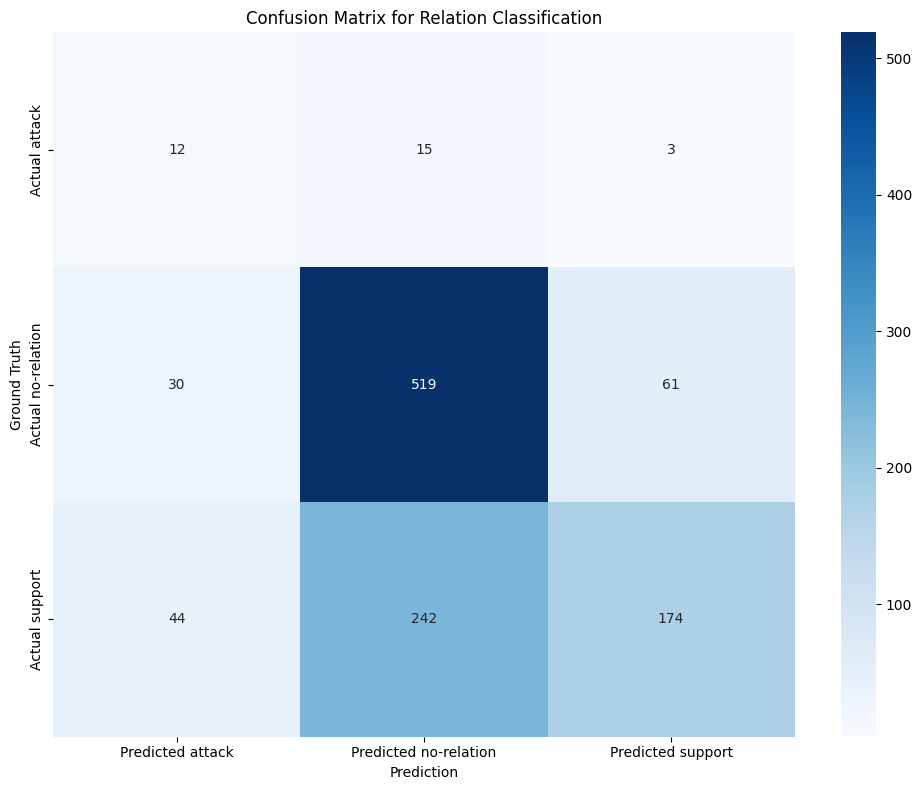


Confusion Matrix:
                    Predicted attack  Predicted no-relation  Predicted support
Actual attack                     12                     15                  3
Actual no-relation                30                    519                 61
Actual support                    44                    242                174


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)

# Load the CSV file
file_path = 'predictions/predictions.csv'
data = pd.read_csv(file_path)

# Extract actual and predicted relations
actual_relations = data['actual_relation']
predicted_relations = data['predicted_relation']

# Define the relation types
relation_types = ["attack", "no-relation", "support" ]

def save_classification_report(predictions, labels, output_dir="./"):
    report = classification_report(
        labels, predictions,
        target_names=relation_types
    )
    
    with open(f"{output_dir}/classification_report.txt", "w") as f:
        f.write(report)
    
    print("Classification Report:")
    print(report)

def plot_confusion_matrix(y_true, y_pred, output_path="confusion_matrix.png"):
    cm = confusion_matrix(y_true, y_pred, labels=relation_types)
    
    # Create labels for each cell showing count
    labels = np.empty_like(cm, dtype=object)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            labels[i, j] = f"{cm[i, j]}"
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=labels, fmt='', cmap="Blues",
                xticklabels=[f"Predicted {rel}" for rel in relation_types],
                yticklabels=[f"Actual {rel}" for rel in relation_types])
    plt.xlabel('Prediction')
    plt.ylabel('Ground Truth')
    plt.title('Confusion Matrix for Relation Classification')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()

# Generate classification report and confusion matrix
save_classification_report(predicted_relations, actual_relations)
plot_confusion_matrix(actual_relations, predicted_relations)

# Display the confusion matrix as a DataFrame for better readability
cm_df = pd.DataFrame(
    confusion_matrix(actual_relations, predicted_relations, labels=relation_types),
    index=[f"Actual {rel}" for rel in relation_types],
    columns=[f"Predicted {rel}" for rel in relation_types]
)

print("\nConfusion Matrix:")
print(cm_df)
